<a href="https://colab.research.google.com/github/guillermodelafuente/IA3_projects/blob/main/Hunger_games_JulioIglesias_Team_v08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Equipo JulioIglesias

Guillermo de la Fuente

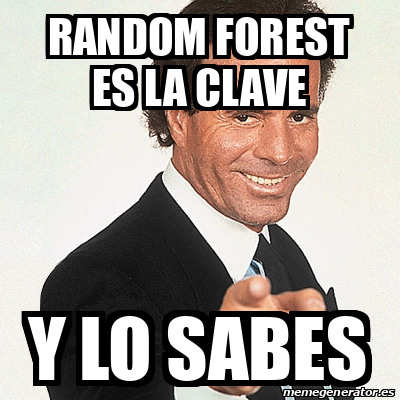

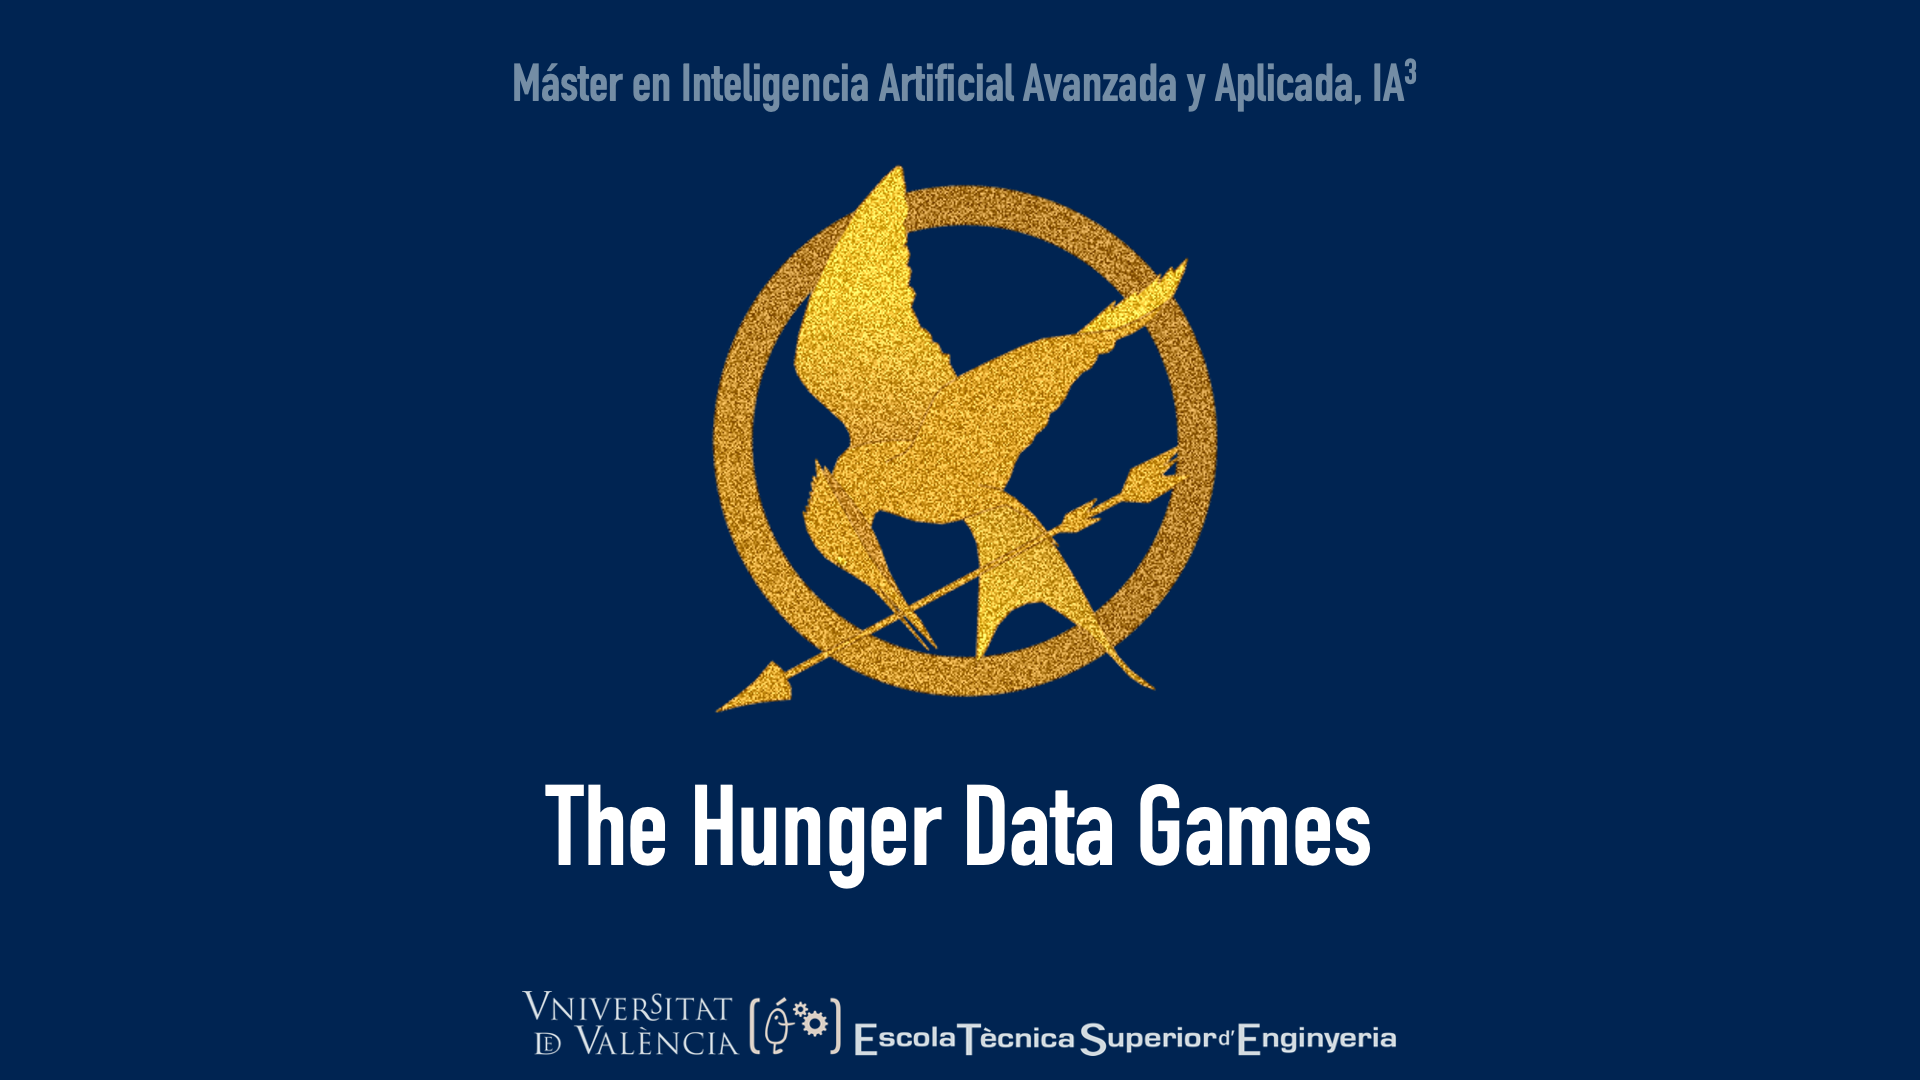

# Libraries

Wellcome to the first hunger data games!!! You have been selected as tributes from your sectors. In this edition you will be facing each other in a classification competition. The dataset you will be facing is this one:



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.tree import plot_tree

from sklearn.ensemble import BaggingClassifier
#hasta aqui
from sklearn.preprocessing import (FunctionTransformer, StandardScaler) # preprocessing 
from sklearn.decomposition import PCA # dimensionality reduction
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from scipy.stats import boxcox # data transform
from sklearn.model_selection import (train_test_split, KFold , StratifiedKFold, 
                                     cross_val_score, GridSearchCV, 
                                     learning_curve, validation_curve) # model selection modules
from sklearn.pipeline import Pipeline # streaming pipelines
from sklearn.base import BaseEstimator, TransformerMixin # To create a box-cox transformation class
from collections import Counter
import warnings

# load models
from xgboost import (XGBClassifier, plot_importance)
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier)
from sklearn.naive_bayes import GaussianNB
from time import time

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle

warnings.filterwarnings('ignore')

# Loading dataset

In [ ]:
url = "https://raw.githubusercontent.com/CuadraAlconero/IDAL_IA3_CuadraAlconero/main/hunger_data.csv"
dataframe = pd.read_csv(url, header=0)
dataframe.drop("Unnamed: 0", axis=1, inplace=True)
dataframe.columns = ["refractive_index", "sodium", "magnesium", "aluminum", "silicon", "potassium", "calcium", "barium", "iron", "type_of_glass"]

The target variable is type_of_glass

In [ ]:
dataframe.head(10)

,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron,type_of_glass
0,1.51589,12.88,3.43,1.40,73.28,0.69,8.05,0.00,0.24,1
1,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
2,1.51844,13.25,3.76,1.32,72.40,0.58,8.42,0.00,0.00,2
3,1.52475,11.45,0.00,1.88,72.19,0.81,13.24,0.00,0.34,2
4,1.51977,13.81,3.58,1.32,71.72,0.12,8.67,0.69,0.00,1
5,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
6,1.51888,14.99,0.78,1.74,72.50,0.00,9.95,0.00,0.00,6
7,1.52211,14.19,3.78,0.91,71.36,0.23,9.14,0.00,0.37,3
8,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.00,0.16,1
9,1.51215,12.99,3.47,1.12,72.98,0.62,8.35,0.00,0.31,1


A few recommendations for you to solve the exercise. Remember the different types of algorithm that we have studied and follow a natural path in building the exercise. Commence using a single estimator and try to build a bagging estimator.

For the evaluation metric check this webpage:

https://scikit-learn.org/stable/modules/model_evaluation.html

Specially check those called balanced_accuracy and f1_micro.

Finally the submission of the exercise must be a model file with the name of your team (find one which is cool I will add the coolness of the name to the final grade). 

Check this webpage for saving the model: https://scikit-learn.org/stable/modules/model_persistence.html

One more thing I will evaluate using the np.random.seed(123) use it for training your model.

In case that a preprocessing of data is performed include a class in the notebook which transforms the original input to your desired one.

# Descriptive statistics and preparing data

In [ ]:
dataframe.head(10)

,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron,type_of_glass
0,1.51589,12.88,3.43,1.40,73.28,0.69,8.05,0.00,0.24,1
1,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
2,1.51844,13.25,3.76,1.32,72.40,0.58,8.42,0.00,0.00,2
3,1.52475,11.45,0.00,1.88,72.19,0.81,13.24,0.00,0.34,2
4,1.51977,13.81,3.58,1.32,71.72,0.12,8.67,0.69,0.00,1
5,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
6,1.51888,14.99,0.78,1.74,72.50,0.00,9.95,0.00,0.00,6
7,1.52211,14.19,3.78,0.91,71.36,0.23,9.14,0.00,0.37,3
8,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.00,0.16,1
9,1.51215,12.99,3.47,1.12,72.98,0.62,8.35,0.00,0.31,1


In [ ]:
#data type
dataframe.dtypes

refractive_index    float64
sodium              float64
magnesium           float64
aluminum            float64
silicon             float64
potassium           float64
calcium             float64
barium              float64
iron                float64
type_of_glass         int64
dtype: object

In [ ]:
#shape of the dataset
dataframe.shape

(117, 10)

In [ ]:
#how many time each class appear in the dataframe
dataframe['type_of_glass'].value_counts()

1    41
2    36
7    16
3    10
5     8
6     6
Name: type_of_glass, dtype: int64

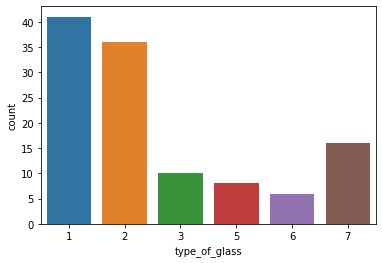

In [ ]:
x = sns.countplot(dataframe['type_of_glass'])
plt.show(x)

In [ ]:
# To quantify the unbalance
weight = (41+36+16)/(41+36+16+10+8+6)
weight

0.7948717948717948

*Notes*

*Dataset is unbalanced, the 80% of the type of glass is distributed in 3 out of 6 classes*

In [ ]:
dataframe.count()

refractive_index    117
sodium              117
magnesium           117
aluminum            117
silicon             117
potassium           117
calcium             117
barium              117
iron                117
type_of_glass       117
dtype: int64

In [ ]:
dataframe.describe()

,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron,type_of_glass
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,1.518621,13.387436,2.509145,1.411624,72.673590,0.537607,9.128889,0.168034,0.061880,2.829060
std,0.003525,0.918562,1.535116,0.528611,0.881914,0.837398,1.607853,0.508017,0.106528,2.154749
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516550,12.860000,0.780000,1.160000,72.340000,0.120000,8.240000,0.000000,0.000000,1.000000
50%,1.517760,13.240000,3.470000,1.320000,72.860000,0.550000,8.710000,0.000000,0.000000,2.000000
75%,1.519770,13.830000,3.580000,1.620000,73.100000,0.610000,9.490000,0.000000,0.100000,5.000000
max,1.533930,17.380000,4.490000,3.040000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


*Notes*

*The features are not on the same scale. For example Si has a mean of 72.65 while Fe has a mean value of 0.057. Features should be on the same scale for algorithms that sume distances such as lineal regresion 




In [ ]:
# We check if there are null values into the dataframe 
import numpy as np
print (np.any(dataframe.isnull()))
print (np.any(dataframe.isna()))
dataframe.isna().sum()

False
False


refractive_index    0
sodium              0
magnesium           0
aluminum            0
silicon             0
potassium           0
calcium             0
barium              0
iron                0
type_of_glass       0
dtype: int64

In [ ]:
# Correlation, very important to check the parameter which has more influence on the target variable
#features = dataframe.columns[:-1].tolist()
features = dataframe.columns[:-1]
dataframe[features].corr()

,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron
refractive_index,1.000000,-0.225319,-0.178052,-0.293700,-0.569535,-0.308273,0.830224,0.130269,0.219961
sodium,-0.225319,1.000000,-0.194281,0.055291,0.018454,-0.236970,-0.318457,0.180500,-0.259560
magnesium,-0.178052,-0.194281,1.000000,-0.478230,-0.095623,-0.101878,-0.457571,-0.411696,0.020042
aluminum,-0.293700,0.055291,-0.478230,1.000000,-0.092575,0.399586,-0.175659,0.366302,-0.036842
silicon,-0.569535,0.018454,-0.095623,-0.092575,1.000000,-0.204812,-0.280734,-0.156138,-0.158982
potassium,-0.308273,-0.236970,-0.101878,0.399586,-0.204812,1.000000,-0.308122,-0.025621,-0.040643
calcium,0.830224,-0.318457,-0.457571,-0.175659,-0.280734,-0.308122,1.000000,-0.037742,0.213294
barium,0.130269,0.180500,-0.411696,0.366302,-0.156138,-0.025621,-0.037742,1.000000,0.011889
iron,0.219961,-0.259560,0.020042,-0.036842,-0.158982,-0.040643,0.213294,0.011889,1.000000


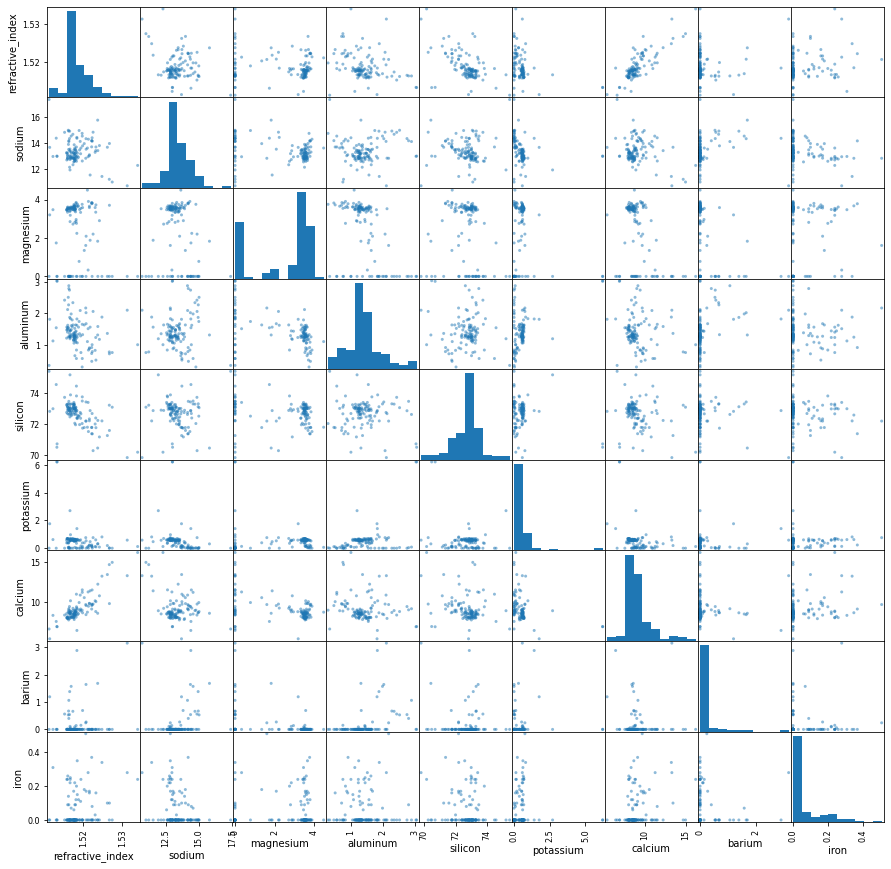

In [ ]:
# Let's explore the relations of multiple variables using a scatter plot of Pandas. The scatter plot is a grid of plots of multiple variables one against the other, showing the relationship of each variable to the others.
# the diagonal correspond with the distribution of each parameter
pd.plotting.scatter_matrix(dataframe[features], figsize=(15.0,15.0));  

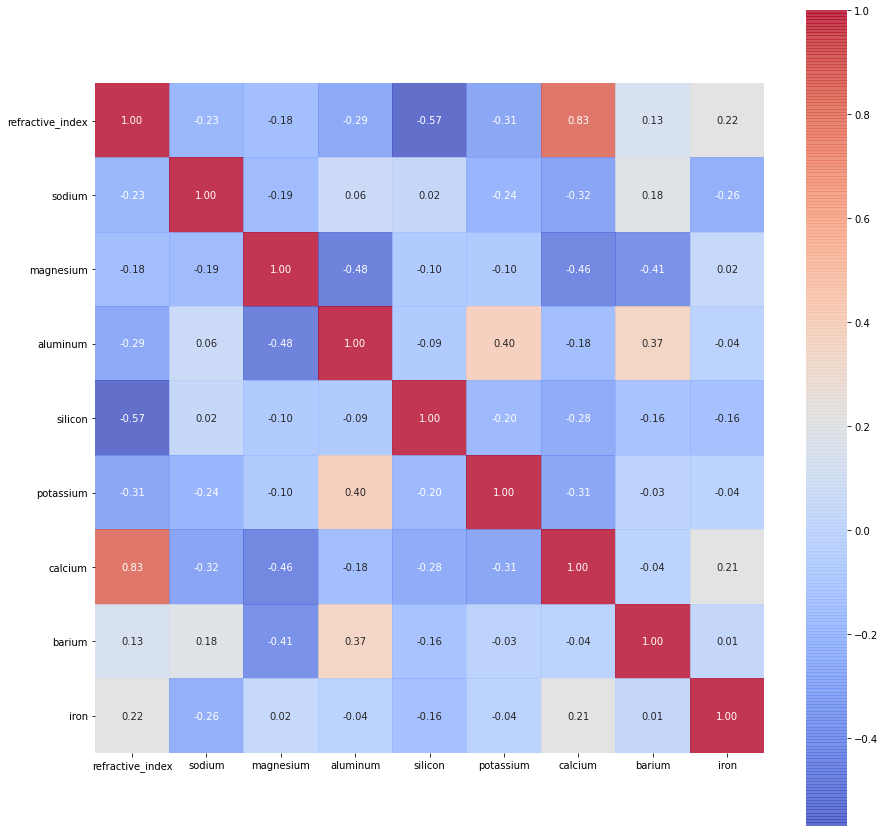

In [ ]:
corr = dataframe[features].corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 10},
           xticklabels= features, yticklabels= features, alpha = 0.8,   cmap= 'coolwarm')
plt.show()

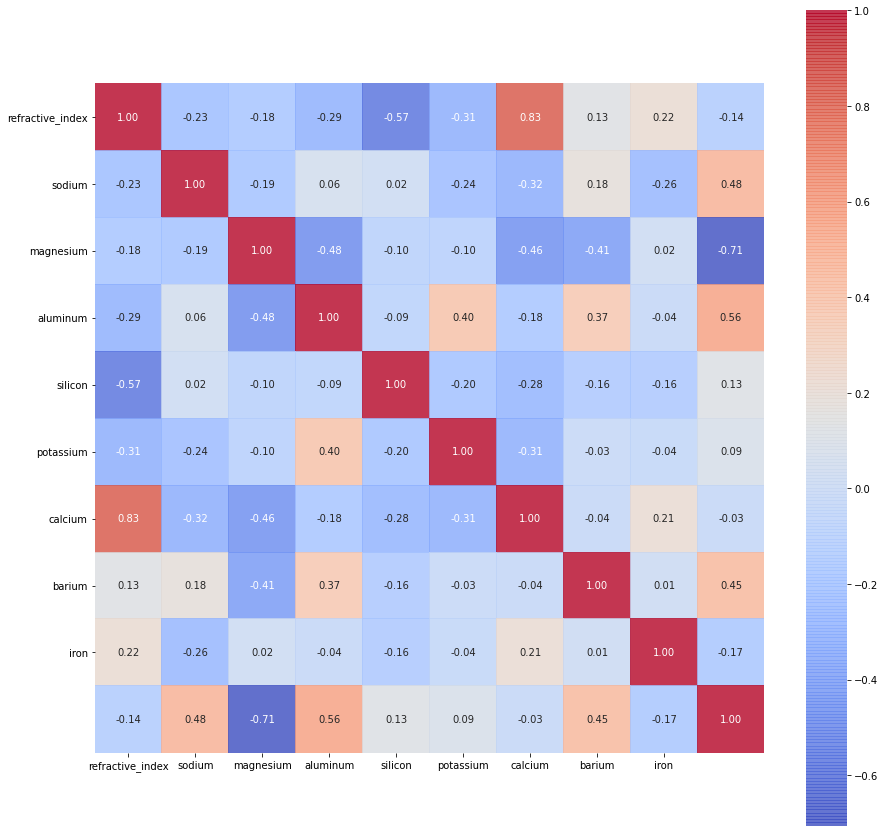

In [ ]:
corr = dataframe.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 10},
           xticklabels= features, yticklabels= features, alpha = 0.8,   cmap= 'coolwarm')
plt.show()

In [ ]:
# VISUALIZATION OF REFRACTIVE INDEX AND CALCIUM WHICH SEEMS TO HAVE SOME CORRELATTION
fig = px.scatter(data_frame=dataframe, x='refractive_index', y='calcium', color='type_of_glass')
fig.show()

Data preparation

In [ ]:
# Outliers detection


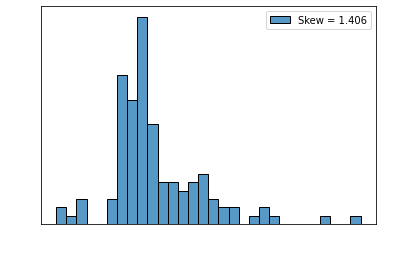

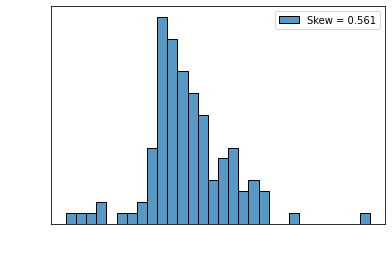

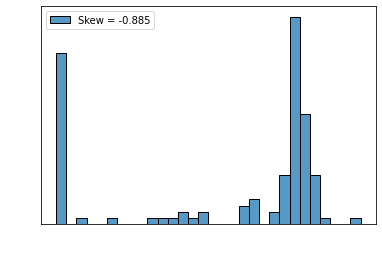

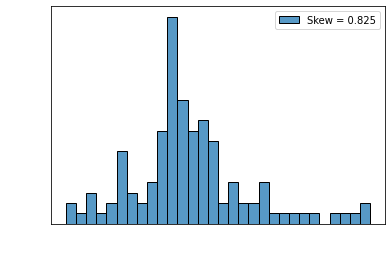

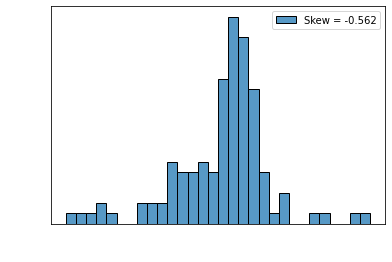

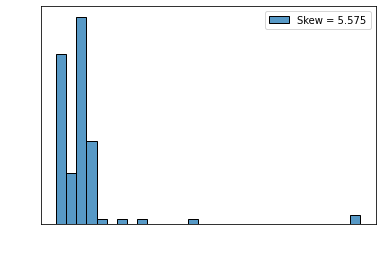

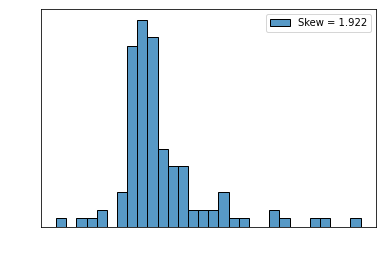

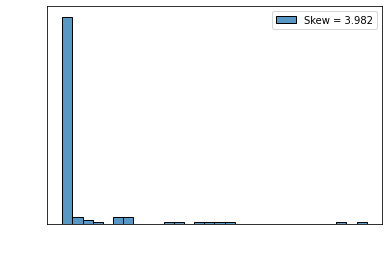

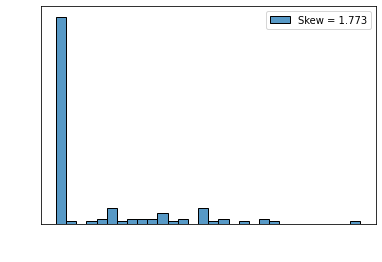

In [ ]:
# Skewness analysis - asymmetry detection
for feat in features:
    skew = dataframe[feat].skew()
    sns.histplot(dataframe[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.tick_params(axis='both', colors='white')
    plt.xlabel(feat, color = 'white')
    plt.ylabel('count', color = 'white')
    plt.show()

Conclusions:
- K and Ba have some outliers
- K Skew =5.5 / Ba Skew = 3.98
- Outliers will be removed
- Tukey method (Tukey JW., 1977) to detect ouliers which defines an interquartile range comprised between the 1st and 3rd quartile of the distribution values (IQR). An outlier is a row that have a feature value outside the (IQR +- an outlier step).

In [ ]:
# Detect observations with more than one outlier
# Tukey Method

def outlier_hunt(dataframe):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers. 
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in dataframe.columns.tolist():
        
        # 1st quartile (25%)
        Q1 = np.percentile(dataframe[col], 25)
        
        # 3rd quartile (75%)
        Q3 = np.percentile(dataframe[col],75)
        
        # Interquartile rrange (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    
    return multiple_outliers   

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(dataframe[features]))))   

The dataset contains 10 observations with more than 2 outliers


In [ ]:
Outliers_to_drop = outlier_hunt(dataframe)

In [ ]:
Outliers_to_drop

[3, 36, 40, 63, 76, 85, 86, 49, 47, 55]

In [ ]:
dataframe.loc[Outliers_to_drop]

,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron,type_of_glass
3,1.52475,11.45,0.00,1.88,72.19,0.81,13.24,0.00,0.34,2
36,1.51131,13.69,3.20,1.81,72.81,1.76,5.43,1.19,0.00,7
40,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28,2
63,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.00,0.00,6
76,1.53393,12.30,0.00,1.00,70.16,0.12,16.19,0.00,0.24,2
85,1.52739,11.02,0.00,0.75,73.08,0.00,14.96,0.00,0.00,2
86,1.52664,11.23,0.00,0.77,73.21,0.00,14.68,0.00,0.00,2
49,1.52365,15.79,1.83,1.31,70.43,0.31,8.61,1.68,0.00,7
47,1.51316,13.02,0.00,3.04,70.48,6.21,6.96,0.00,0.00,5
55,1.51321,13.00,0.00,3.02,70.70,6.21,6.93,0.00,0.00,5


In [ ]:
dataframe.shape

(117, 10)

In [ ]:
# Drop outliers
dataframe_1 = dataframe.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

In [ ]:
dataframe_1.shape

(107, 10)

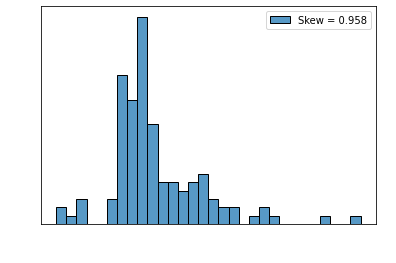

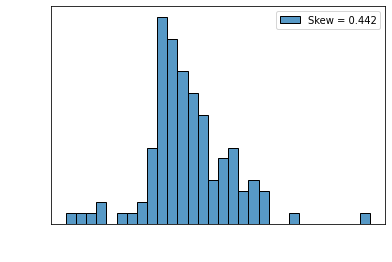

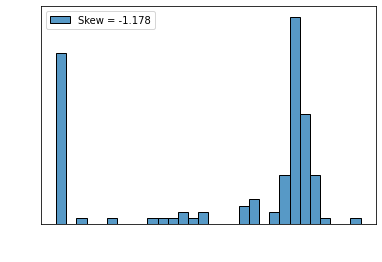

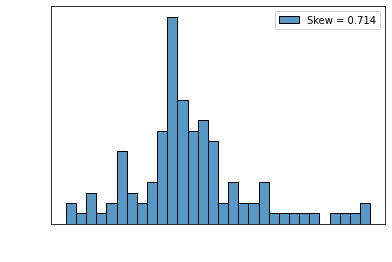

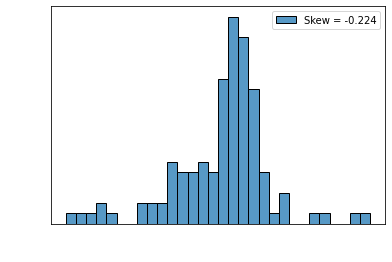

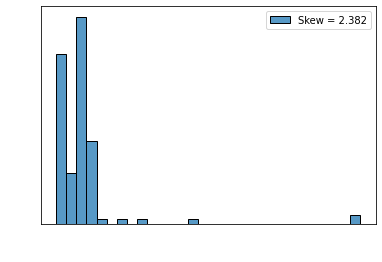

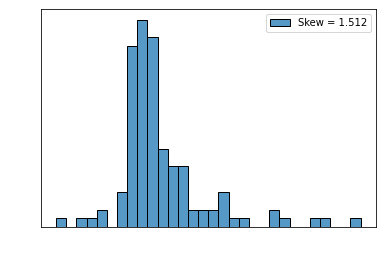

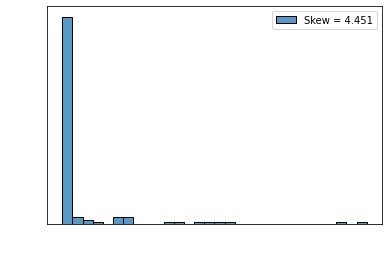

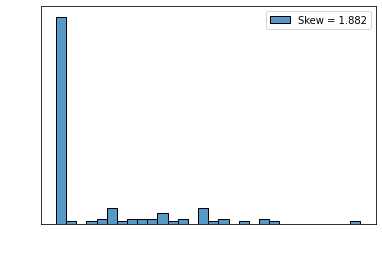

In [ ]:
# Skewness analysis - asymmetry detection after preparing data
for feat in features:
    skew = dataframe_1[feat].skew()
    sns.histplot(dataframe[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.tick_params(axis='both', colors='white')
    plt.xlabel(feat, color = 'white')
    plt.ylabel('count', color = 'white')
    plt.show()

In [ ]:
# check if skew is closer to zero after a outliers removal
for feature in features:
    delta = np.abs( dataframe_1[feature].skew() / dataframe[feature].skew() )
    if delta < 1.0 :
        print('Feature %s is less skewed after a Outliers removal ' %(feature))
    else:
        print('Feature %s is **MORE** skewed after a Outliers removal '  %(feature))

Feature refractive_index is less skewed after a Outliers removal 
Feature sodium is less skewed after a Outliers removal 
Feature magnesium is **MORE** skewed after a Outliers removal 
Feature aluminum is less skewed after a Outliers removal 
Feature silicon is less skewed after a Outliers removal 
Feature potassium is less skewed after a Outliers removal 
Feature calcium is less skewed after a Outliers removal 
Feature barium is **MORE** skewed after a Outliers removal 
Feature iron is **MORE** skewed after a Outliers removal 


Input and output creation

In [ ]:
# Dataset split
# with outliers: dataframe
# withOUT outliers: dataframe_1
Y = dataframe_1.iloc[:, -1:]
X = dataframe_1.iloc[:, :-1]
# I have performed different splits for features (X) which might have more weight in the analysis. 
# ('refractive_index', 'sodium', 'magnesium', 'aluminum', 'silicon', 'potassium', 'calcium', 'barium', 'iron' )
X_1 = dataframe_1.loc[:, ['refractive_index', 'sodium', 'magnesium', 'aluminum', 'silicon', 'potassium', 'calcium']]
X_2 = dataframe_1.loc[:, ['refractive_index', 'sodium', 'magnesium', 'aluminum', 'calcium']]

In [ ]:
# set a seed and a test size for splitting the dataset 
seed = 123
test_size = 0.2
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size , random_state = seed)

X_1_train, X_1_test, Y_train, Y_test = train_test_split(X_1, Y, test_size = test_size , random_state = seed)
X_2_train, X_2_test, Y_train, Y_test = train_test_split(X_2, Y, test_size = test_size , random_state = seed)

# Modeling

## XGBoost. Simple Modeling

Elapsed time to train XGBoost  0.932 seconds


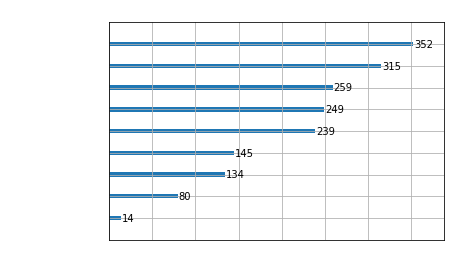

In [ ]:
#XGBoost
model_importances = XGBClassifier(scoring='f1_micro')
start = time()
model_importances.fit(X_train, np.ravel(Y_train))
print('Elapsed time to train XGBoost  %.3f seconds' %(time()-start))
plot_importance(model_importances)
plt.tick_params(axis='both', colors='white')
plt.xlabel('F score', color = 'white')
plt.ylabel('Features', color = 'white')
plt.title('Feaure importance', color ='white')
plt.show()

In [ ]:
# Results
print ('Results XGBoost:')
print('Train results = ', model_importances.score(X_train, np.ravel(Y_train)))
print('Train results = ', model_importances.score(X_test, np.ravel(Y_test)))

Results XGBoost:
Train results =  1.0
Train results =  0.7727272727272727


## Esemble Modeling. Cross Validation

Cross validate models

I compared 10 popular classifiers and evaluate the mean accuracy of each of them by a stratified kfold cross validation procedure.

- SVC
- Decision Tree
- AdaBoost
- Random Forest
- Extra Trees
- Gradient Boosting
- Multiple layer perceprton (neural network)
- KNN
- Logistic regression
- Linear Discriminant Analysis

In [ ]:
# Kfold Stratified Cross Val
kfold = StratifiedKFold(n_splits=10)

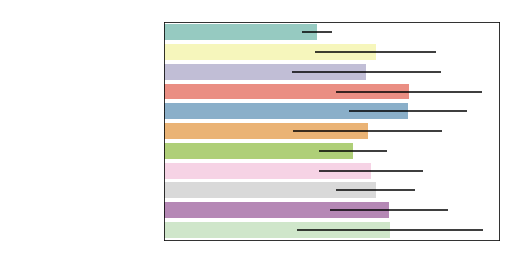

In [ ]:
# Kfold Stratified Cross Val
# Modeling step Test differents algorithms 

random_state = seed
#n_estimators = 200
classifiers = []

classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())
classifiers.append(XGBClassifier())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = Y_train, scoring = "f1_micro", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis","XGBClassifier"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy",color='white')
g.set_ylabel('Algorithm', color = 'white')
g = g.set_title("Cross validation scores", color='white')
plt.tick_params(axis='both', colors='white')


In [ ]:
cv_res.head(11)

,CrossValMeans,CrossValerrors,Algorithm
0,0.398611,0.039308,SVC
1,0.552778,0.157845,DecisionTree
2,0.527778,0.195236,AdaBoost
3,0.638889,0.191143,RandomForest
4,0.637500,0.154965,ExtraTrees
5,0.531944,0.195241,GradientBoosting
6,0.493056,0.089419,MultipleLayerPerceptron
7,0.541667,0.136224,KNeighboors
8,0.552778,0.102965,LogisticRegression
9,0.587500,0.154666,LinearDiscriminantAnalysis


## Random Forest .Simple Modeling

In [ ]:
# Random Forest wirh X_Train
model = RandomForestClassifier(n_estimators=1500, criterion= 'entropy', max_depth=  5, class_weight='balanced')
model.fit(X_train, np.ravel(Y_train))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
f1_score_test_micro = f1_score(Y_test, model.predict(X_test), average = 'micro')
f1_score_train_micro =f1_score(Y_test, model.predict(X_test), average = 'micro')
f1_score_test_w = f1_score(Y_test, model.predict(X_test), average = 'weighted')
f1_score_train_w =f1_score(Y_test, model.predict(X_test), average = 'weighted')
print('f1_score_test_micro is: ', f1_score_test_micro)
print('f1_score_train_micro is: ', f1_score_train_micro)
print('f1_score_test_w is: ', f1_score_test_w)
print('f1_score_train_w is: ', f1_score_train_w)

f1_score_test_micro is:  0.8181818181818182
f1_score_train_micro is:  0.8181818181818182
f1_score_test_w is:  0.8171717171717172
f1_score_train_w is:  0.8171717171717172


In [ ]:
model.feature_importances_

array([0.09900872, 0.18097548, 0.23257609, 0.1189457 , 0.0695298 ,
       0.10055596, 0.13235999, 0.04772943, 0.01831884])

In [ ]:
X_1_train.head(0)

,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium


In [ ]:
# Random Forest wirh X_1_Train
model_X1 = RandomForestClassifier(n_estimators=1500, criterion= 'entropy', max_depth=  5)
model_X1.fit(X_1_train, np.ravel(Y_train))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
f1_score_test_micro = f1_score(Y_test, model_X1.predict(X_1_test), average = 'micro')
f1_score_train_micro =f1_score(Y_test, model_X1.predict(X_1_test), average = 'micro')
f1_score_test_w = f1_score(Y_test, model_X1.predict(X_1_test), average = 'weighted')
f1_score_train_w =f1_score(Y_test, model_X1.predict(X_1_test), average = 'weighted')
print('f1_score_test_micro is: ', f1_score_test_micro)
print('f1_score_train_micro is: ', f1_score_train_micro)
print('f1_score_test_w is: ', f1_score_test_w)
print('f1_score_train_w is: ', f1_score_train_w)

f1_score_test_micro is:  0.7727272727272727
f1_score_train_micro is:  0.7727272727272727
f1_score_test_w is:  0.7363636363636363
f1_score_train_w is:  0.7363636363636363


## Random Forest. Cross Validation

In [ ]:
#CROSS VALIDATION. GridSearchCV
# Random Forest Cross Val with X_train

param_grid = {'n_estimators': [800, 1000, 1500], 'max_depth': [5, 6, 8, 10, 12, 15]}
model = RandomForestClassifier(class_weight='balanced')
cv = GridSearchCV(model, param_grid, scoring="f1_micro", cv=3)

In [ ]:
cv.fit(X_train, np.ravel(Y_train))

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                             

In [ ]:
# Best parameters
print('Best parameters:')
print(cv.best_params_)

Best parameters:
{'max_depth': 8, 'n_estimators': 1000}


In [ ]:
# Results Validation = test dataset
f1_score_test_micro = f1_score(Y_test, cv.predict(X_test), average = 'micro')
f1_score_train_micro =f1_score(Y_test, cv.predict(X_test), average = 'micro')
f1_score_test_w = f1_score(Y_test, cv.predict(X_test), average = 'weighted')
f1_score_train_w =f1_score(Y_test, cv.predict(X_test), average = 'weighted')
print('f1_score_test_micro is: ', f1_score_test_micro)
print('f1_score_train_micro is: ', f1_score_train_micro)
print('f1_score_test_w is: ', f1_score_test_w)
print('f1_score_train_w is: ', f1_score_train_w)

f1_score_test_micro is:  0.8181818181818182
f1_score_train_micro is:  0.8181818181818182
f1_score_test_w is:  0.8171717171717172
f1_score_train_w is:  0.8171717171717172


Conclussions:
- f1_score_test_micro is:  0.8181818181818182
- Noted: Other trials have been performed using different X_train by removing features aparently less important as per results of both XGBoost and Random forest model. None of them results better than mentioned above model
- Therefore, mentioned model cv. will be saved as glass_estimator for C ROC evaluation. 


### Random Forest. Simple Modeling with X1 Train

In [ ]:
#CROSS VALIDATION. GridSearchCV
# Random Forest Cross Val with X1_train
# X1_train results from removin the 2 feactures less important from first Random Forest analysis

param_grid = {'n_estimators': [200, 300, 500], 'max_depth': [5, 6, 8, 10, 12, 15]}
model = RandomForestClassifier()
cv_X1 = GridSearchCV(model, param_grid, scoring="f1_micro", cv=3)
cv_X1.fit(X_1_train, np.ravel(Y_train))

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
# Results Validation = test dataset
f1_score_test_micro = f1_score(Y_test, cv_X1.predict(X_1_test), average = 'micro')
f1_score_train_micro =f1_score(Y_test, cv_X1.predict(X_1_test), average = 'micro')
f1_score_test_w = f1_score(Y_test, cv_X1.predict(X_1_test), average = 'weighted')
f1_score_train_w =f1_score(Y_test, cv_X1.predict(X_1_test), average = 'weighted')
print('f1_score_test_micro is: ', f1_score_test_micro)
print('f1_score_train_micro is: ', f1_score_train_micro)
print('f1_score_test_w is: ', f1_score_test_w)
print('f1_score_train_w is: ', f1_score_train_w)

f1_score_test_micro is:  0.6818181818181818
f1_score_train_micro is:  0.6818181818181818
f1_score_test_w is:  0.631198347107438
f1_score_train_w is:  0.631198347107438


In [ ]:
# Best parameters
print('Best parameters:')
print(cv_X1.best_params_)

Best parameters:
{'max_depth': 15, 'n_estimators': 500}


Results with X_1 train are pretty bad in compare with X_train from baseline. Therefore, we final aproach will be considering X_train as dataset of inputs and Random forest CV with a performance of 77% in f1_micro

## Model Persistence 

https://scikit-learn.org/stable/modules/model_persistence.html

In [ ]:
import pickle
s= pickle.dumps(cv)
glass_estimator = pickle.loads(s)

In [ ]:
glass_estimator.predict(X_test)

array([1, 2, 1, 7, 2, 1, 1, 6, 2, 7, 5, 7, 2, 1, 2, 1, 1, 2, 2, 2, 1, 7])

## Evaluation. ROC Curves and AUC

In [ ]:
#ROC Curves

In [ ]:
# Binarize the output - ONE-HOT-ENCODING
y = label_binarize(Y, classes = [1, 2, 3, 5, 6, 7])
y_test = label_binarize(Y_test, classes = [1, 2, 3, 5, 6, 7])

In [ ]:
n_classes = y.shape[1]
n_classes
y_score = glass_estimator.predict_proba(X_test)

In [ ]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

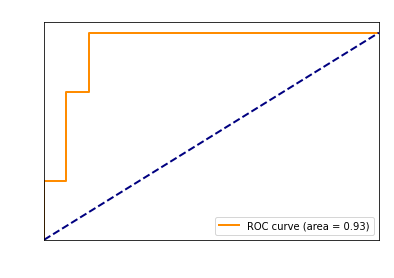

In [ ]:
# Plot of a ROC curve for a specific class
plt.figure()
lw = 2
classs = 1
plt.plot(fpr[classs], tpr[classs], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[classs])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', color = 'white')
plt.ylabel('True Positive Rate', color = 'white')
plt.title('Receiver operating characteristic ROC', color = 'white')
plt.tick_params(axis='both', colors='white')
plt.legend(loc="lower right")
plt.show()

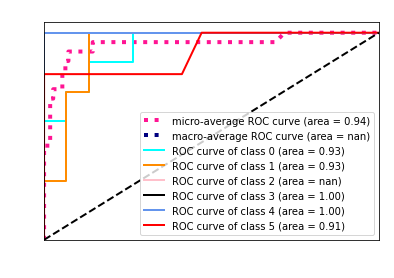

In [ ]:
# PLOT ROC MULTICLASS

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'pink', 'black', 'cornflowerblue', 'red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', color = 'white')
plt.ylabel('True Positive Rate', color = 'white')
plt.title('Receiver operating characteristic to multi-class ROC', color = 'white')
plt.tick_params(axis='both', colors='white')
plt.legend(loc="lower right")
plt.show()

If observed values are all the same, in other words, if the data consists entirely of observed Presences or entirely of observed Absences, auc will return NaN.

In [ ]:
## END ##